<a href="https://colab.research.google.com/github/shuuuuyu/113-2-Generative-AI/blob/main/assignment_2_%E6%88%91%E7%9A%84%E7%AC%AC%E4%B8%80%E5%80%8B%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 簡介:全連結神經網路(DNN)
- 只需決定隱藏層數量、每層幾個神經元!!

- **我在這份作業中的修改:**
    - **神經元層數設為5層：**逐漸減少神經元數量（例如128 → 64 → 32），形成類似金字塔結構，有助於濃縮資訊並降低過擬合風險。
    - **加入批次正規化（Batch Normalization）：**讓數據分佈保持穩定，避免梯度消失或梯度爆炸
    - **改成LeakyReLU：**解決 ReLU「神經元死亡」問題，保持梯度流動

- **Loss下降：**
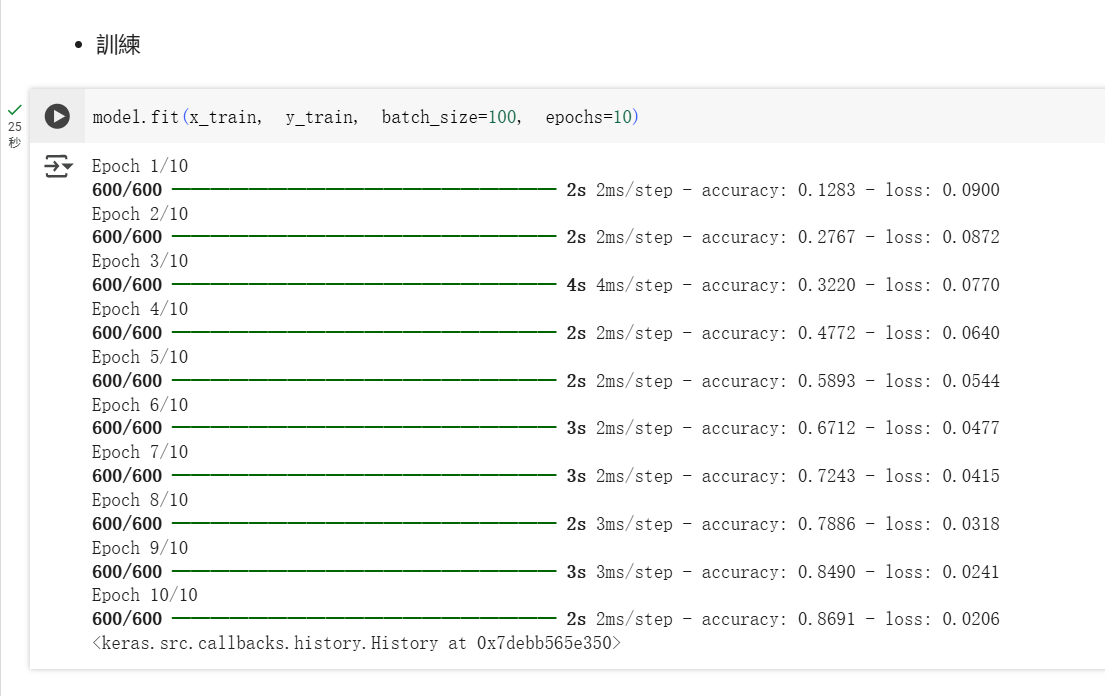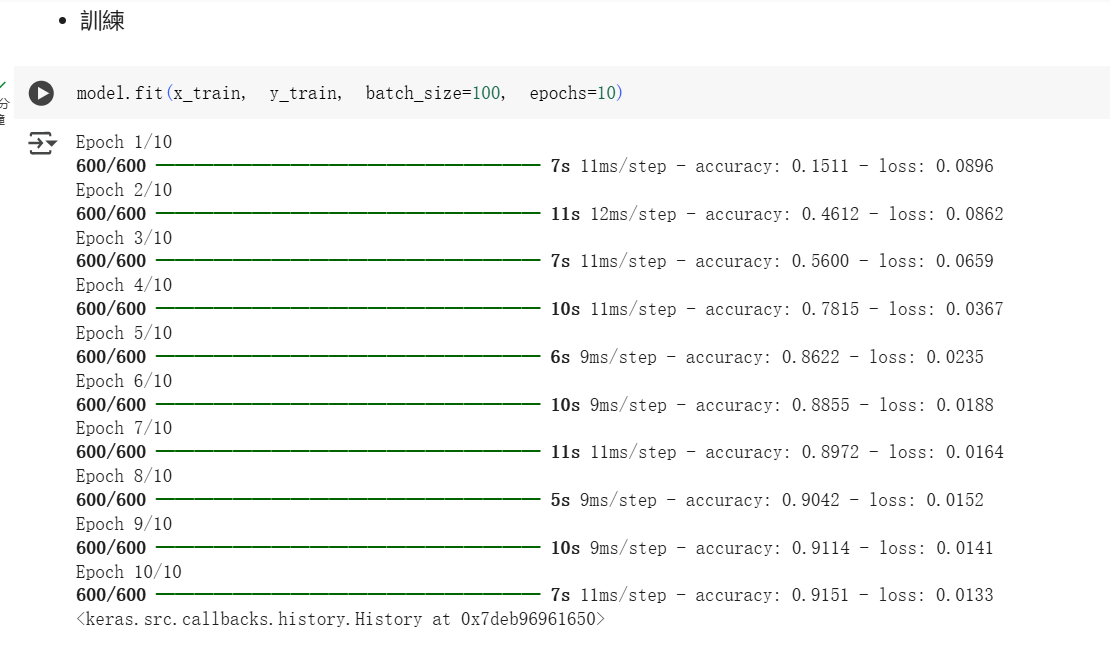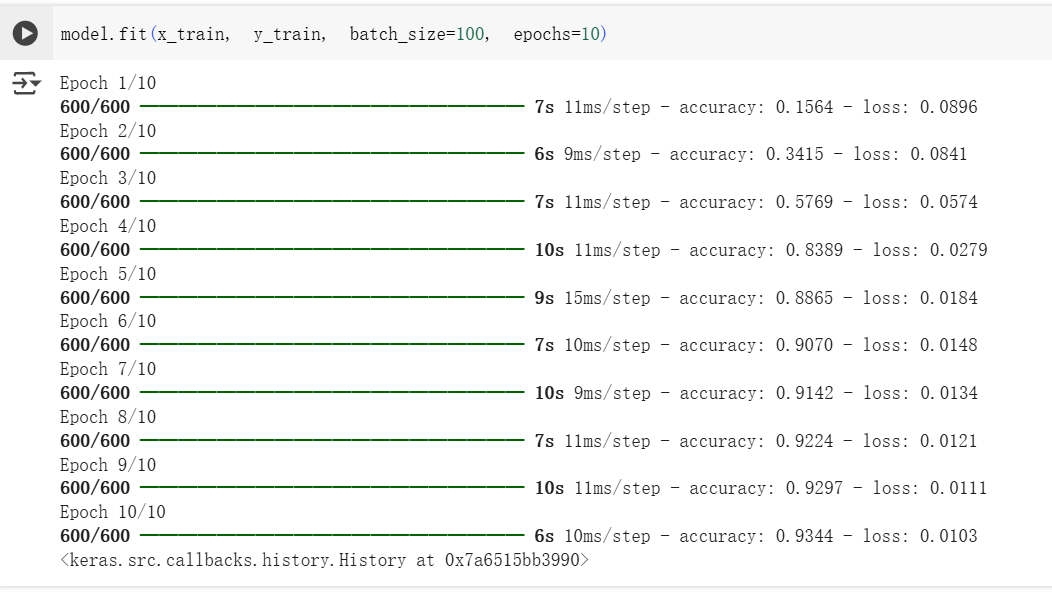

- **正確率上升：**
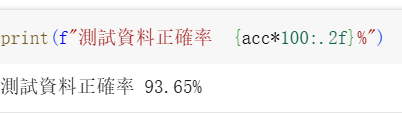
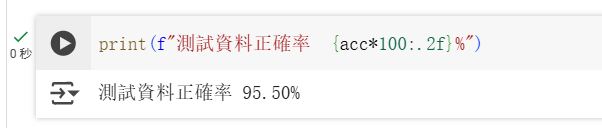

- **成功截圖：**
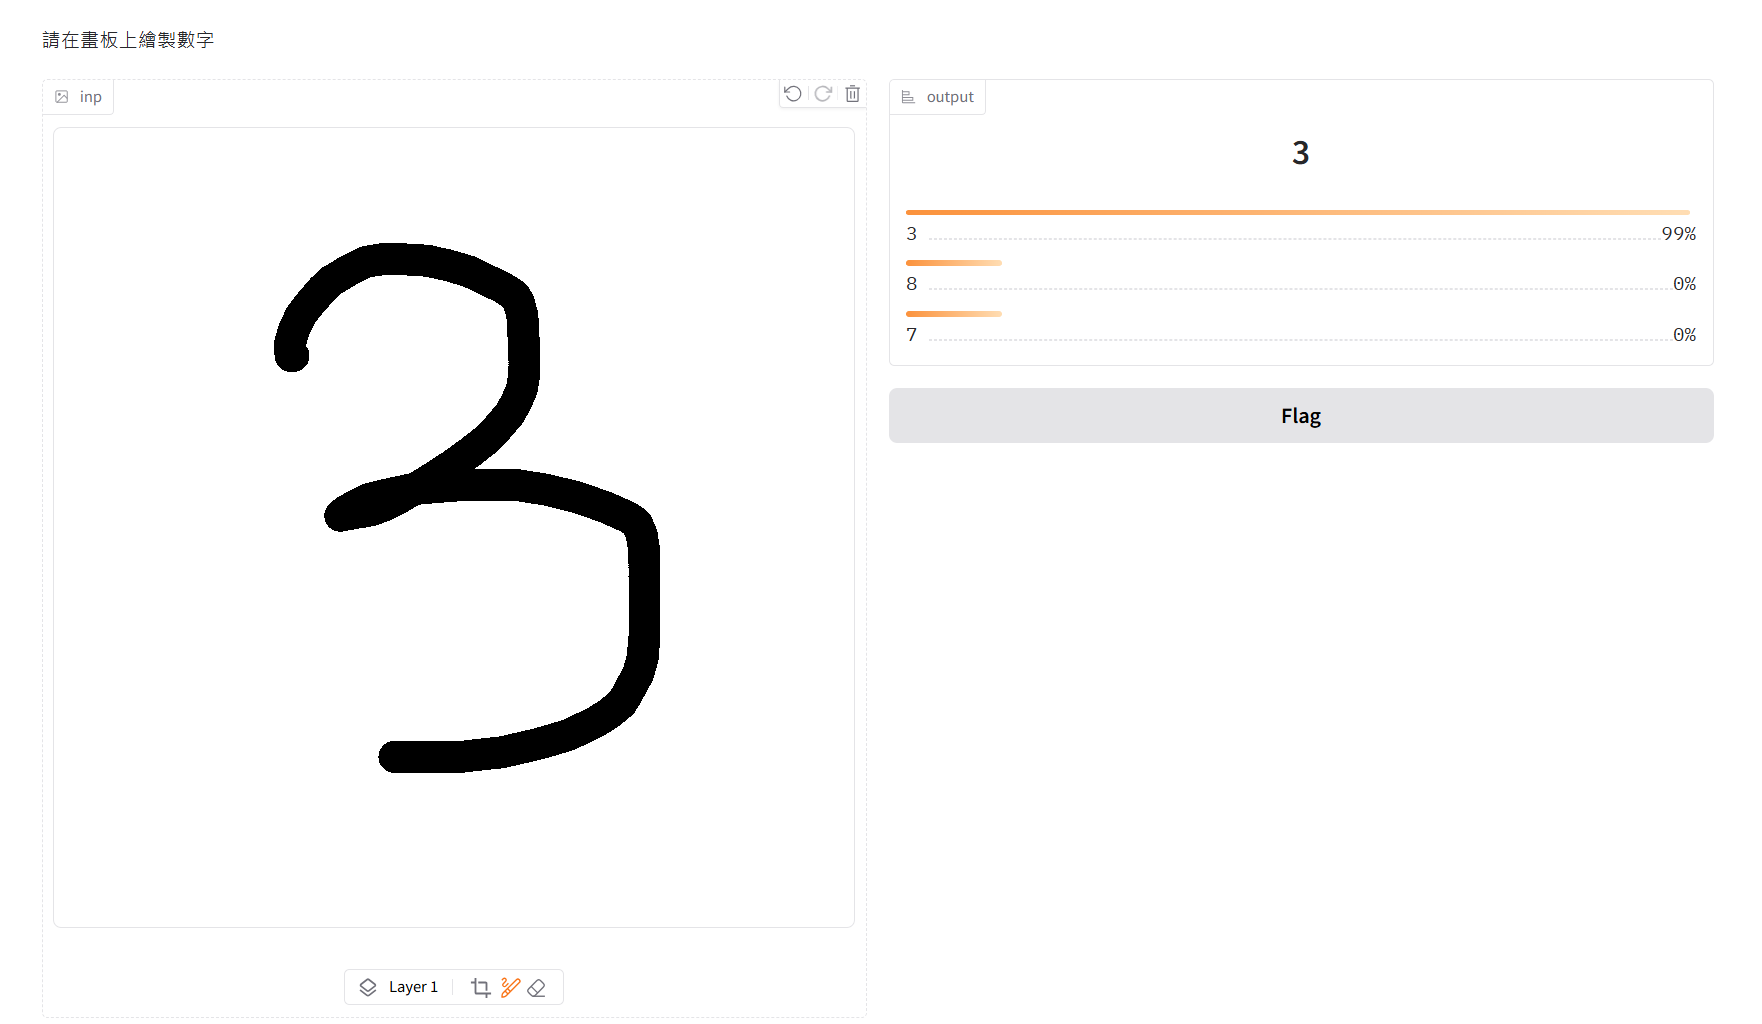

## 1. 自行設神經元層數

In [ ]:
N1 = 512
N2 = 256
N3 = 128
N4 = 64
N5 = 32

## 2. 讀入套件


In [ ]:
!pip install gradio

In [ ]:
%matplotlib

#標準數據分析圖靈套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#互動設計用
from ipywidgets import interact_manual

#神速打造 web app 的 Gradio
import gradio as gr

Using matplotlib backend: agg


## 3. 讀入數據庫(由Keras讀入MINST)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

看看訓練資料是不是6萬筆，測試資料室不是1萬筆

In [ ]:
print(f'訓練資料總筆數為{len(x_train)}筆資料')
print(f'測試資料總筆數為{len(x_test)}筆資料')

訓練資料總筆數為60000筆資料
測試資料總筆數為10000筆資料


## 4. 輸入/輸出格式整理
Keras已幫我們準備好套件!

- 輸入:我們現在要用標準神經網路學學手寫辨識，原來的每筆數據是個28*28的矩陣，但標準神經網路只吃「平平的」資料，也就是每次要25*25=784長的向量。因此我們要用 reshape 調校一下。

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255


- 輸出:1-hot enconding

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
n = 87
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## 打造第一個神經網路

### 3.1 決定神經網路架構，讀入相關套件

- 建構我們的神經網路

In [ ]:
model = Sequential()
#from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout


In [ ]:
#失敗的部分，這部分程式碼使的正確率下降、Loss上升
"""model.add(Dense(N1, input_dim=784))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))  # 30% 的神經元隨機關閉，防止過擬合

model.add(Dense(N2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))  # 再次防止過擬合

model.add(Dense(N3))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))  # 這層 Dropout 變成 20%，可以測試不同的比例

model.add(Dense(N4))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))  # 最後一層隱藏層的 Dropout

model.add(Dense(10, activation='softmax'))  # 輸出層，不加 Dropout

In [142]:
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [143]:
model.add(Dense(N2, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

In [ ]:
model.add(Dense(N3, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

In [ ]:
model.add(Dense(N4, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

In [ ]:
model.add(Dense(N5, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

In [ ]:
model.add(Dense(10, activation='softmax'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

- 組裝

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

- 檢視

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_29 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_30 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_31 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_32 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_33 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_34 (LeakyReLU)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 580,818 (2.22 MB)

 Trainable params: 578,814 (2.21 MB)

 Non-trainable params: 2,004 (7.83 KB)

- 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4652 - loss: 0.1490
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7944 - loss: 0.0352
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8607 - loss: 0.0258
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8915 - loss: 0.0208
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9147 - loss: 0.0174
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9293 - loss: 0.0149
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9374 - loss: 0.0137
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9436 - loss: 0.0124
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9499 - loss: 0.0115
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9539 - loss: 0.0107


- 試用

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9417 - loss: 0.0105


In [ ]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 95.31%


In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [144]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9417 - loss: 0.0105


In [145]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.00872479472309351
正確率 0.9531000256538391


- 展示

In [146]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [147]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://683500dd1d779f0340.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
